# Group Number : 20
Members: 



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
url = 'https://raw.githubusercontent.com/netariel/Olympic-Games-Data/main/dataset_olympics.csv'
olympic_df = pd.read_csv(url)
olympic_df.shape

(70000, 15)

Our data consists of 15 columns and 70,000 rows

In [32]:
olympic_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN
69996,35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Slalom,NaN
69997,35657,"David Thomas ""Dave"" Fitzsimons",M,26.0,170.0,65.0,Australia,AUS,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Men's 10,000 metres",NaN
69998,35657,"David Thomas ""Dave"" Fitzsimons",M,30.0,170.0,65.0,Australia,AUS,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",NaN


In [33]:
olympic_df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

בשביל לדעת איך לעבוד עם הנתונים רצינו לדעת את סוג האובייקט בכל עמודה

In [225]:
num_of_team = len(olympic_df['Team'].unique())
num_of_NOC = len(olympic_df['NOC'].unique())
print(f"num of Team:{num_of_team}\nnum of NOC:{num_of_NOC}")

num of Team:827
num of NOC:226


ראינו שיש אי התאמה בין מספר המדינות לבין מספר סמלי המדינה.
בדקנו את שמות המדינות וראינו שיש מדינות שקרויות פעמים עם שינוי בתו, אך מדובר על אותה מדינה ולכן החלטנו שבמידה ונרצה להתייחס לנתון המדינה/קבוצה נשתמש בעמודת הסמל

Text(0.5, 1.0, 'Male and Female shows')

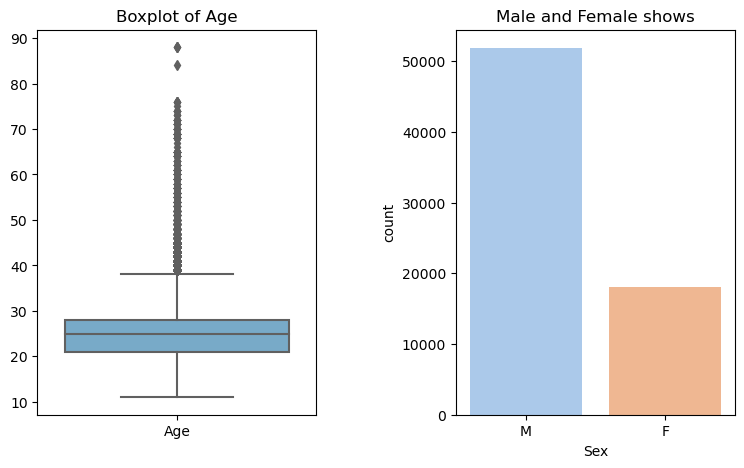

In [143]:
fig, ax = plt.subplots(1, 2, figsize=(9, 5))
sns.boxplot(data=olympic_df[['Age']], ax=ax[0],palette='Blues')
ax[0].set_title('Boxplot of Age')
sns.set_palette("pastel")
sns.countplot(x="Sex", data=olympic_df, ax=ax[1])
plt.subplots_adjust(wspace=0.5)
ax[1].set_title('Male and Female shows')

רצינו לראות את ההתפלגות הגילאים והמינים של השחקנים שהשתתפו באולימפיאדה

In [252]:
med_df = olympic_df.groupby('NOC')[['Medal']].count() 
med_df= med_df.reset_index()
med_df = med_df.nlargest(10, 'Medal')

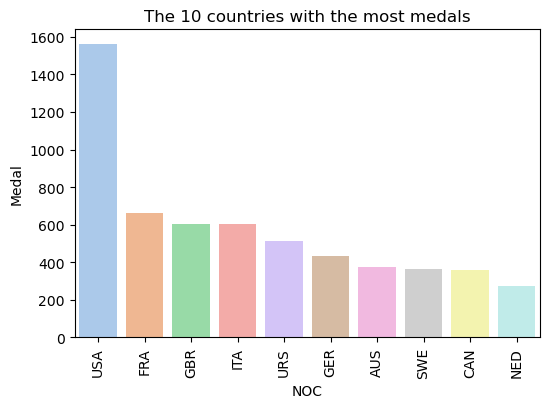

In [227]:
plt.figure(figsize=(6, 4))
sns.barplot(x='NOC', y='Medal', data=med_df)
plt.title('The 10 countries with the most medals')
plt.xlabel('NOC')
plt.ylabel('Medal')
plt.xticks(rotation=90)
plt.show()

In [278]:
events_df = olympic_df.groupby('Games')[['Sport']].nunique()
events_df= events_df.reset_index()
events_df

,Games,Sport
0,1896 Summer,9
1,1900 Summer,20
2,1904 Summer,17
3,1906 Summer,13
4,1908 Summer,24
5,1912 Summer,17
6,1920 Summer,25
7,1924 Summer,20
8,1924 Winter,10
9,1928 Summer,17


In [241]:
col_to_dummy = ['Sex','Medal']
col_num = ['Age','Height','Weight']
dummy_olympic =  pd.get_dummies(olympic_df[col_to_dummy])
dummy_olympic.columns

,Medal,Sex_F,Sex_M
0,0,False,True
1,0,False,True
2,0,False,True
3,2,False,True
4,0,True,False
...,...,...,...
69995,0,False,True
69996,0,False,True
69997,0,False,True
69998,0,False,True


In [234]:
len(olympic_df['NOC'].unique())

226

In [26]:
olympic_df['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [6]:
olympic_df.shape

(70000, 15)

In [7]:
year_df = olympic_df.groupby('Year')
year_df

In [9]:
tr = olympic_df[olympic_df['Year'] == 1896]
tr

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3079,1724,Aristidis Akratopoulos,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Singles,NaN
3080,1724,Aristidis Akratopoulos,M,NaN,NaN,NaN,Greece-3,GRE,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Doubles,NaN
3081,1725,"Konstantinos ""Kostas"" Akratopoulos",M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Singles,NaN
3082,1725,"Konstantinos ""Kostas"" Akratopoulos",M,NaN,NaN,NaN,Greece-3,GRE,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Doubles,NaN
7348,4113,Anastasios Andreou,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 110 metres Hurdles,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63072,32330,Launceston Elliot,M,21.0,188.0,102.0,Great Britain,GBR,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Rope Climbing,NaN
68788,35093,Alexios Fetsis,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Shooting,"Shooting Men's Free Rifle, Three Positions, 30...",NaN
68789,35093,Alexios Fetsis,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Shooting,"Shooting Men's Military Rifle, 200 metres",NaN
68790,35094,Angelos Fetsis,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 800 metres,NaN


In [30]:
tr = olympic_df[olympic_df['Medal'] == 'Bronze']
len(tr)

3208

In [10]:
med_df = med_df.reset_index()
med_df

,Year,Medal,City
0,1896,25,65
1,1900,188,631
2,1904,124,308
3,1906,112,431
4,1908,223,865
5,1912,239,1025
6,1920,371,1218
7,1924,266,1579
8,1928,221,1434
9,1932,199,914
